In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2ded419dd8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2ded419a58>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2ded419dd8>)


Epoch 1: 13.5s to complete
    error(train)=1.98e+00, acc(train)=4.89e-01, error(valid)=1.98e+00, acc(valid)=4.86e-01


Epoch 2: 15.9s to complete
    error(train)=1.45e+00, acc(train)=5.99e-01, error(valid)=1.45e+00, acc(valid)=5.97e-01


Epoch 3: 14.0s to complete
    error(train)=1.28e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


Epoch 4: 14.9s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


Epoch 5: 15.4s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 6: 13.8s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 7: 14.8s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


Epoch 8: 14.4s to complete
    error(train)=9.72e-01, acc(train)=7.20e-01, error(valid)=9.80e-01, acc(valid)=7.16e-01


Epoch 9: 14.5s to complete
    error(train)=9.35e-01, acc(train)=7.29e-01, error(valid)=9.45e-01, acc(valid)=7.24e-01


Epoch 10: 14.9s to complete
    error(train)=9.05e-01, acc(train)=7.37e-01, error(valid)=9.15e-01, acc(valid)=7.31e-01


Epoch 11: 14.1s to complete
    error(train)=8.75e-01, acc(train)=7.46e-01, error(valid)=8.88e-01, acc(valid)=7.40e-01


Epoch 12: 13.3s to complete
    error(train)=8.49e-01, acc(train)=7.51e-01, error(valid)=8.63e-01, acc(valid)=7.43e-01


Epoch 13: 12.0s to complete
    error(train)=8.25e-01, acc(train)=7.58e-01, error(valid)=8.40e-01, acc(valid)=7.51e-01


Epoch 14: 15.7s to complete
    error(train)=8.04e-01, acc(train)=7.64e-01, error(valid)=8.19e-01, acc(valid)=7.54e-01


Epoch 15: 18.3s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=8.01e-01, acc(valid)=7.61e-01


Epoch 16: 19.7s to complete
    error(train)=7.65e-01, acc(train)=7.74e-01, error(valid)=7.82e-01, acc(valid)=7.67e-01


Epoch 17: 20.7s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.65e-01, acc(valid)=7.70e-01


Epoch 18: 22.4s to complete
    error(train)=7.30e-01, acc(train)=7.83e-01, error(valid)=7.49e-01, acc(valid)=7.76e-01


Epoch 19: 29.2s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.36e-01, acc(valid)=7.79e-01


Epoch 20: 27.7s to complete
    error(train)=7.04e-01, acc(train)=7.90e-01, error(valid)=7.25e-01, acc(valid)=7.79e-01


Epoch 21: 30.1s to complete
    error(train)=6.90e-01, acc(train)=7.93e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


Epoch 22: 30.2s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=7.02e-01, acc(valid)=7.84e-01


Epoch 23: 30.3s to complete
    error(train)=6.71e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


Epoch 24: 30.9s to complete
    error(train)=6.59e-01, acc(train)=8.00e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


Epoch 25: 30.3s to complete
    error(train)=6.51e-01, acc(train)=8.02e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 26: 31.0s to complete
    error(train)=6.40e-01, acc(train)=8.05e-01, error(valid)=6.65e-01, acc(valid)=7.95e-01


Epoch 27: 30.8s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


Epoch 28: 31.1s to complete
    error(train)=6.23e-01, acc(train)=8.09e-01, error(valid)=6.52e-01, acc(valid)=8.00e-01


Epoch 29: 31.0s to complete
    error(train)=6.15e-01, acc(train)=8.11e-01, error(valid)=6.46e-01, acc(valid)=8.03e-01


Epoch 30: 29.4s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 31: 31.4s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.36e-01, acc(valid)=8.01e-01


Epoch 32: 30.9s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.26e-01, acc(valid)=8.03e-01


Epoch 33: 31.3s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


Epoch 34: 30.3s to complete
    error(train)=5.83e-01, acc(train)=8.19e-01, error(valid)=6.16e-01, acc(valid)=8.08e-01


Epoch 35: 31.4s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 36: 32.3s to complete
    error(train)=5.72e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 37: 34.0s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 38: 30.9s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.11e-01


Epoch 39: 30.5s to complete
    error(train)=5.54e-01, acc(train)=8.26e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


Epoch 40: 29.5s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.11e-01


Epoch 41: 31.6s to complete
    error(train)=5.45e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.16e-01


Epoch 42: 30.3s to complete
    error(train)=5.43e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


Epoch 43: 30.9s to complete
    error(train)=5.39e-01, acc(train)=8.29e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 44: 30.4s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 45: 30.3s to complete
    error(train)=5.28e-01, acc(train)=8.33e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 46: 30.9s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 47: 29.0s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 48: 29.7s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 49: 30.2s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 50: 29.9s to complete
    error(train)=5.10e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


Epoch 51: 30.0s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 52: 29.4s to complete
    error(train)=5.07e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 53: 30.0s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 54: 29.7s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 55: 30.9s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 56: 32.4s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 57: 29.0s to complete
    error(train)=4.89e-01, acc(train)=8.44e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


Epoch 58: 29.8s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 59: 29.8s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 60: 29.4s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 61: 30.0s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 62: 30.9s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


Epoch 63: 31.0s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 64: 31.9s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 65: 29.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 66: 29.4s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 67: 31.7s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 68: 30.6s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 69: 30.0s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 70: 30.6s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 71: 29.2s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 72: 29.9s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 73: 30.6s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 74: 30.7s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 75: 31.1s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 76: 29.8s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 77: 30.7s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 78: 30.3s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 79: 32.2s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 80: 29.7s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 81: 31.9s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 82: 31.7s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 83: 31.2s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 84: 30.8s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 85: 31.3s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 86: 30.7s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 87: 30.7s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 88: 30.3s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 89: 31.8s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 90: 32.3s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 91: 29.8s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 92: 30.6s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 93: 30.1s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 94: 29.8s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 95: 31.7s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 96: 31.3s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 97: 29.4s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 98: 30.4s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 99: 31.3s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 100: 30.0s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


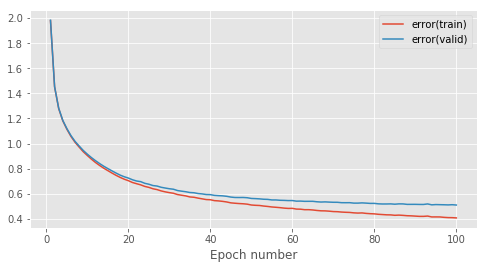

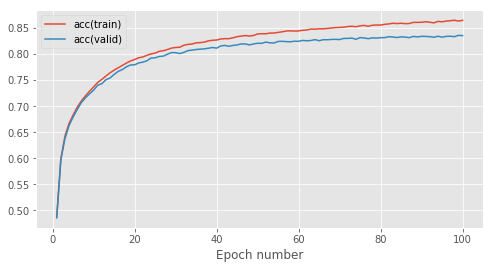

In [3]:
############## L2

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.00005
# learning_rates = [0.1,0.01,0.001,0.0001]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
coefficient = 0.0001
l2 = L2Penalty(coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = l2)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Epoch 1: 13.1s to complete
    error(train)=1.96e+00, acc(train)=4.98e-01, error(valid)=1.96e+00, acc(valid)=4.95e-01


Epoch 2: 12.2s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.46e+00, acc(valid)=5.97e-01


Epoch 3: 13.9s to complete
    error(train)=1.30e+00, acc(train)=6.36e-01, error(valid)=1.30e+00, acc(valid)=6.34e-01


Epoch 4: 15.5s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.20e+00, acc(valid)=6.54e-01


Epoch 5: 14.4s to complete
    error(train)=1.12e+00, acc(train)=6.78e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


Epoch 6: 14.1s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 7: 14.7s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 8: 13.4s to complete
    error(train)=9.72e-01, acc(train)=7.20e-01, error(valid)=9.82e-01, acc(valid)=7.18e-01


Epoch 9: 14.6s to complete
    error(train)=9.37e-01, acc(train)=7.29e-01, error(valid)=9.50e-01, acc(valid)=7.21e-01


Epoch 10: 13.6s to complete
    error(train)=9.03e-01, acc(train)=7.37e-01, error(valid)=9.17e-01, acc(valid)=7.32e-01


Epoch 11: 14.4s to complete
    error(train)=8.73e-01, acc(train)=7.45e-01, error(valid)=8.88e-01, acc(valid)=7.39e-01


Epoch 12: 13.5s to complete
    error(train)=8.46e-01, acc(train)=7.52e-01, error(valid)=8.63e-01, acc(valid)=7.46e-01


Epoch 13: 14.5s to complete
    error(train)=8.23e-01, acc(train)=7.58e-01, error(valid)=8.42e-01, acc(valid)=7.50e-01


Epoch 14: 15.4s to complete
    error(train)=8.03e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.57e-01


Epoch 15: 14.0s to complete
    error(train)=7.85e-01, acc(train)=7.67e-01, error(valid)=8.07e-01, acc(valid)=7.60e-01


Epoch 16: 14.5s to complete
    error(train)=7.65e-01, acc(train)=7.73e-01, error(valid)=7.89e-01, acc(valid)=7.67e-01


Epoch 17: 15.3s to complete
    error(train)=7.49e-01, acc(train)=7.76e-01, error(valid)=7.74e-01, acc(valid)=7.67e-01


Epoch 18: 14.1s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.59e-01, acc(valid)=7.72e-01


Epoch 19: 14.0s to complete
    error(train)=7.20e-01, acc(train)=7.84e-01, error(valid)=7.46e-01, acc(valid)=7.75e-01


Epoch 20: 12.9s to complete
    error(train)=7.08e-01, acc(train)=7.87e-01, error(valid)=7.35e-01, acc(valid)=7.76e-01


Epoch 21: 14.2s to complete
    error(train)=6.95e-01, acc(train)=7.90e-01, error(valid)=7.24e-01, acc(valid)=7.78e-01


Epoch 22: 15.1s to complete
    error(train)=6.85e-01, acc(train)=7.92e-01, error(valid)=7.16e-01, acc(valid)=7.83e-01


Epoch 23: 14.7s to complete
    error(train)=6.72e-01, acc(train)=7.97e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


Epoch 24: 13.0s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


Epoch 25: 13.1s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.91e-01, acc(valid)=7.90e-01


Epoch 26: 15.7s to complete
    error(train)=6.44e-01, acc(train)=8.03e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


Epoch 27: 13.0s to complete
    error(train)=6.36e-01, acc(train)=8.05e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 28: 13.5s to complete
    error(train)=6.27e-01, acc(train)=8.08e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


Epoch 29: 14.0s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


Epoch 30: 16.9s to complete
    error(train)=6.11e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=7.98e-01


Epoch 31: 13.7s to complete
    error(train)=6.08e-01, acc(train)=8.11e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 32: 13.4s to complete
    error(train)=5.99e-01, acc(train)=8.16e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 33: 17.8s to complete
    error(train)=5.92e-01, acc(train)=8.16e-01, error(valid)=6.36e-01, acc(valid)=8.02e-01


Epoch 34: 16.2s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 35: 16.1s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


Epoch 36: 16.2s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.21e-01, acc(valid)=8.05e-01


Epoch 37: 17.1s to complete
    error(train)=5.68e-01, acc(train)=8.23e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


Epoch 38: 15.9s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


Epoch 39: 16.4s to complete
    error(train)=5.60e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


Epoch 40: 14.3s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


Epoch 41: 14.5s to complete
    error(train)=5.49e-01, acc(train)=8.28e-01, error(valid)=6.03e-01, acc(valid)=8.13e-01


Epoch 42: 16.1s to complete
    error(train)=5.45e-01, acc(train)=8.30e-01, error(valid)=6.00e-01, acc(valid)=8.14e-01


Epoch 43: 16.4s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 44: 14.0s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 45: 14.6s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 46: 13.4s to complete
    error(train)=5.29e-01, acc(train)=8.34e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 47: 15.0s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 48: 14.0s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 49: 15.9s to complete
    error(train)=5.19e-01, acc(train)=8.34e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 50: 14.8s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


Epoch 51: 15.3s to complete
    error(train)=5.10e-01, acc(train)=8.38e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


Epoch 52: 17.3s to complete
    error(train)=5.06e-01, acc(train)=8.39e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 53: 15.5s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 54: 15.5s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 55: 12.5s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 56: 15.2s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 57: 14.8s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 58: 15.0s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 59: 15.2s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 60: 16.0s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 61: 15.5s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 62: 15.0s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 63: 14.7s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 64: 15.1s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 65: 14.0s to complete
    error(train)=4.69e-01, acc(train)=8.49e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 66: 15.1s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 67: 14.0s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 68: 14.2s to complete
    error(train)=4.60e-01, acc(train)=8.51e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 69: 15.2s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


Epoch 70: 14.5s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 71: 14.9s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


Epoch 72: 14.7s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 73: 13.5s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 74: 14.0s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 75: 14.0s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


Epoch 76: 16.4s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 77: 14.3s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.25e-01


Epoch 78: 15.7s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 79: 14.9s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 80: 14.4s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 81: 15.1s to complete
    error(train)=4.34e-01, acc(train)=8.59e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 82: 14.5s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 83: 15.9s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 84: 16.4s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 85: 16.1s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 86: 14.8s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 87: 13.9s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 88: 13.7s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 89: 12.9s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 90: 14.3s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 91: 14.5s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 92: 14.3s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 93: 16.1s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


Epoch 94: 15.2s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 95: 14.6s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 96: 14.2s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 97: 13.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 98: 15.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 99: 13.5s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 100: 14.5s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


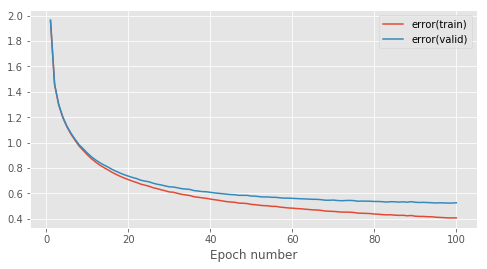

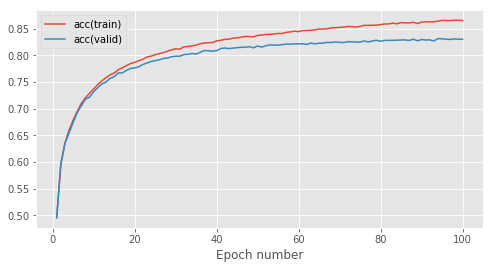

In [4]:
############## weight decay

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.00005
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [5]:
##### constant learning rate





In [6]:
###### cosine annealing schedule









learning_rate 6e-05
epoch 1


Epoch 1: 13.0s to complete
    error(train)=1.68e+00, acc(train)=5.51e-01, error(valid)=1.68e+00, acc(valid)=5.56e-01


learning_rate 5.999547680335254e-05
epoch 2


Epoch 2: 15.1s to complete
    error(train)=1.34e+00, acc(train)=6.25e-01, error(valid)=1.34e+00, acc(valid)=6.25e-01


learning_rate 5.998191167725916e-05
epoch 3


Epoch 3: 15.2s to complete
    error(train)=1.21e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


learning_rate 5.995931800886157e-05
epoch 4


Epoch 4: 16.1s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


learning_rate 5.9927718095382715e-05
epoch 5


Epoch 5: 13.8s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


learning_rate 5.9887143122122096e-05
epoch 6


Epoch 6: 14.4s to complete
    error(train)=9.99e-01, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


learning_rate 5.983763313167965e-05
epoch 7


Epoch 7: 14.4s to complete
    error(train)=9.55e-01, acc(train)=7.23e-01, error(valid)=9.72e-01, acc(valid)=7.18e-01


learning_rate 5.977923698443852e-05
epoch 8


Epoch 8: 13.3s to complete
    error(train)=9.10e-01, acc(train)=7.36e-01, error(valid)=9.28e-01, acc(valid)=7.29e-01


learning_rate 5.971201231034579e-05
epoch 9


Epoch 9: 16.5s to complete
    error(train)=8.76e-01, acc(train)=7.44e-01, error(valid)=8.96e-01, acc(valid)=7.38e-01


learning_rate 5.9636025452038646e-05
epoch 10


Epoch 10: 12.3s to complete
    error(train)=8.45e-01, acc(train)=7.52e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


learning_rate 5.9551351399372246e-05
epoch 11


Epoch 11: 14.1s to complete
    error(train)=8.19e-01, acc(train)=7.58e-01, error(valid)=8.41e-01, acc(valid)=7.53e-01


learning_rate 5.9458073715413736e-05
epoch 12


Epoch 12: 15.4s to complete
    error(train)=7.95e-01, acc(train)=7.63e-01, error(valid)=8.17e-01, acc(valid)=7.59e-01


learning_rate 5.935628445397564e-05
epoch 13


Epoch 13: 14.5s to complete
    error(train)=7.73e-01, acc(train)=7.69e-01, error(valid)=7.97e-01, acc(valid)=7.64e-01


learning_rate 5.924608406876983e-05
epoch 14


Epoch 14: 15.7s to complete
    error(train)=7.55e-01, acc(train)=7.76e-01, error(valid)=7.83e-01, acc(valid)=7.68e-01


learning_rate 5.9127581314271843e-05
epoch 15


Epoch 15: 13.7s to complete
    error(train)=7.37e-01, acc(train)=7.79e-01, error(valid)=7.66e-01, acc(valid)=7.72e-01


learning_rate 5.900089313839337e-05
epoch 16


Epoch 16: 15.0s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.49e-01, acc(valid)=7.77e-01


learning_rate 5.8866144567068754e-05
epoch 17


Epoch 17: 15.5s to complete
    error(train)=7.05e-01, acc(train)=7.87e-01, error(valid)=7.37e-01, acc(valid)=7.79e-01


learning_rate 5.8723468580869486e-05
epoch 18


Epoch 18: 13.4s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.29e-01, acc(valid)=7.79e-01


learning_rate 5.8573005983768477e-05
epoch 19


Epoch 19: 15.8s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


learning_rate 5.841490526418348e-05
epoch 20


Epoch 20: 15.6s to complete
    error(train)=6.67e-01, acc(train)=7.97e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


learning_rate 5.824932244843702e-05
epoch 21


Epoch 21: 15.5s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01


learning_rate 5.807642094677717e-05
epoch 22


Epoch 22: 16.2s to complete
    error(train)=6.48e-01, acc(train)=8.01e-01, error(valid)=6.89e-01, acc(valid)=7.88e-01


learning_rate 5.78963713921114e-05
epoch 23


Epoch 23: 14.5s to complete
    error(train)=6.37e-01, acc(train)=8.06e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


learning_rate 5.770935147161255e-05
epoch 24


Epoch 24: 14.3s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.70e-01, acc(valid)=7.95e-01


learning_rate 5.7515545751362946e-05
epoch 25


Epoch 25: 19.0s to complete
    error(train)=6.20e-01, acc(train)=8.09e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


learning_rate 5.731514549421002e-05
epoch 26


Epoch 26: 17.2s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.56e-01, acc(valid)=8.00e-01


learning_rate 5.710834847101299e-05
epoch 27


Epoch 27: 16.8s to complete
    error(train)=6.00e-01, acc(train)=8.14e-01, error(valid)=6.47e-01, acc(valid)=8.02e-01


learning_rate 5.6895358765466814e-05
epoch 28


Epoch 28: 14.4s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


learning_rate 5.667638657269632e-05
epoch 29


Epoch 29: 14.6s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.36e-01, acc(valid)=8.05e-01


learning_rate 5.6451647991818954e-05
epoch 30


Epoch 30: 14.0s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


learning_rate 5.6221364812681e-05
epoch 31


Epoch 31: 16.1s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.27e-01, acc(valid)=8.07e-01


learning_rate 5.5985764296977866e-05
epoch 32


Epoch 32: 14.3s to complete
    error(train)=5.68e-01, acc(train)=8.22e-01, error(valid)=6.24e-01, acc(valid)=8.07e-01


learning_rate 5.574507895397414e-05
epoch 33


Epoch 33: 15.3s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.20e-01, acc(valid)=8.07e-01


learning_rate 5.549954631104507e-05
epoch 34


Epoch 34: 14.9s to complete
    error(train)=5.56e-01, acc(train)=8.27e-01, error(valid)=6.13e-01, acc(valid)=8.11e-01


learning_rate 5.524940867926573e-05
epoch 35


Epoch 35: 16.4s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


learning_rate 5.499491291427918e-05
epoch 36


Epoch 36: 15.4s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


learning_rate 5.473631017267984e-05
epoch 37


Epoch 37: 15.6s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


learning_rate 5.4473855664152155e-05
epoch 38


Epoch 38: 15.8s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


learning_rate 5.420780839960955e-05
epoch 39


Epoch 39: 13.2s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


learning_rate 5.393843093558184e-05
epoch 40


Epoch 40: 13.9s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01


learning_rate 5.366598911510369e-05
epoch 41


Epoch 41: 14.2s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


learning_rate 5.339075180535961e-05
epoch 42


Epoch 42: 14.3s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


learning_rate 5.311299063234451e-05
epoch 43


Epoch 43: 14.9s to complete
    error(train)=5.15e-01, acc(train)=8.35e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


learning_rate 5.283297971280165e-05
epoch 44


Epoch 44: 15.1s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


learning_rate 5.255099538370248e-05
epoch 45


Epoch 45: 16.3s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


learning_rate 5.2267315929535455e-05
epoch 46


Epoch 46: 14.5s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


learning_rate 5.1982221307672794e-05
epoch 47


Epoch 47: 14.9s to complete
    error(train)=5.00e-01, acc(train)=8.40e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


learning_rate 5.1695992872086385e-05
epoch 48


Epoch 48: 15.1s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


learning_rate 5.140891309568538e-05
epoch 49


Epoch 49: 14.9s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


learning_rate 5.112126529154951e-05
epoch 50


Epoch 50: 14.2s to complete
    error(train)=4.90e-01, acc(train)=8.43e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 5.083333333333334e-05
epoch 51


Epoch 51: 13.8s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


learning_rate 5.054540137511716e-05
epoch 52


Epoch 52: 15.1s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


learning_rate 5.0257753570981295e-05
epoch 53


Epoch 53: 13.3s to complete
    error(train)=4.81e-01, acc(train)=8.46e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


learning_rate 4.997067379458029e-05
epoch 54


Epoch 54: 16.8s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


learning_rate 4.968444535899388e-05
epoch 55


Epoch 55: 13.9s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


learning_rate 4.939935073713122e-05
epoch 56


Epoch 56: 14.6s to complete
    error(train)=4.72e-01, acc(train)=8.49e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


learning_rate 4.911567128296419e-05
epoch 57


Epoch 57: 15.1s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


learning_rate 4.883368695386503e-05
epoch 58


Epoch 58: 15.3s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 4.855367603432217e-05
epoch 59


Epoch 59: 16.9s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 4.8275914861307067e-05
epoch 60


Epoch 60: 17.9s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 4.8000677551562986e-05
epoch 61


Epoch 61: 14.7s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


learning_rate 4.7728235731084834e-05
epoch 62


Epoch 62: 14.9s to complete
    error(train)=4.58e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 4.745885826705712e-05
epoch 63


Epoch 63: 14.8s to complete
    error(train)=4.55e-01, acc(train)=8.54e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 4.719281100251452e-05
epoch 64


Epoch 64: 15.0s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 4.693035649398684e-05
epoch 65


Epoch 65: 17.0s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


learning_rate 4.667175375238749e-05
epoch 66


Epoch 66: 13.6s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


learning_rate 4.6417257987400946e-05
epoch 67


Epoch 67: 16.2s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


learning_rate 4.61671203556216e-05
epoch 68


Epoch 68: 14.9s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


learning_rate 4.5921587712692535e-05
epoch 69


Epoch 69: 16.2s to complete
    error(train)=4.42e-01, acc(train)=8.57e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 4.568090236968881e-05
epoch 70


Epoch 70: 15.7s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


learning_rate 4.544530185398567e-05
epoch 71


Epoch 71: 15.6s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


learning_rate 4.521501867484772e-05
epoch 72


Epoch 72: 15.0s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


learning_rate 4.499028009397035e-05
epoch 73


Epoch 73: 16.1s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


learning_rate 4.4771307901199866e-05
epoch 74


Epoch 74: 15.2s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 4.4558318195653693e-05
epoch 75


Epoch 75: 13.2s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


learning_rate 4.4351521172456655e-05
epoch 76


Epoch 76: 14.4s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


learning_rate 4.4151120915303735e-05
epoch 77


Epoch 77: 14.8s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 4.3957315195054125e-05
epoch 78


Epoch 78: 13.9s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


learning_rate 4.377029527455527e-05
epoch 79


Epoch 79: 14.7s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


learning_rate 4.359024571988951e-05
epoch 80


Epoch 80: 15.7s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


learning_rate 4.341734421822965e-05
epoch 81


Epoch 81: 15.2s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


learning_rate 4.325176140248319e-05
epoch 82


Epoch 82: 14.2s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 4.3093660682898204e-05
epoch 83


Epoch 83: 14.0s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


learning_rate 4.294319808579719e-05
epoch 84


Epoch 84: 13.2s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


learning_rate 4.280052209959793e-05
epoch 85


Epoch 85: 14.5s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 4.26657735282733e-05
epoch 86


Epoch 86: 17.0s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


learning_rate 4.253908535239483e-05
epoch 87


Epoch 87: 15.7s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


learning_rate 4.242058259789684e-05
epoch 88


Epoch 88: 16.5s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


learning_rate 4.2310382212691035e-05
epoch 89


Epoch 89: 8.4s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


learning_rate 4.220859295125294e-05
epoch 90


Epoch 90: 7.9s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 4.2115315267294434e-05
epoch 91


Epoch 91: 8.4s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 4.203064121462803e-05
epoch 92


Epoch 92: 7.7s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 4.195465435632089e-05
epoch 93


Epoch 93: 7.7s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 4.188742968222815e-05
epoch 94


Epoch 94: 7.6s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


learning_rate 4.1829033534987025e-05
epoch 95


Epoch 95: 7.6s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


learning_rate 4.177952354454458e-05
epoch 96


Epoch 96: 8.5s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 4.173894857128396e-05
epoch 97


Epoch 97: 8.8s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


learning_rate 4.170734865780511e-05
epoch 98


Epoch 98: 7.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 4.1684754989407516e-05
epoch 99


Epoch 99: 8.4s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 4.167118986331413e-05
epoch 100


Epoch 100: 7.1s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


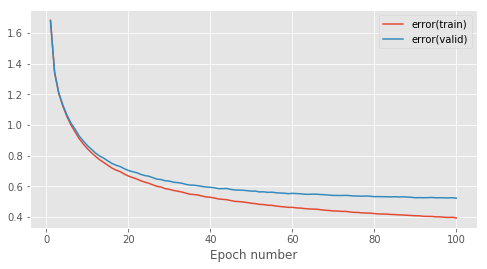

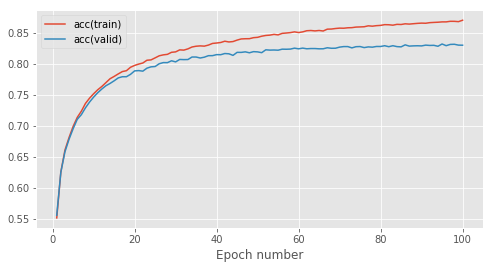

In [7]:
###### no restarts in the scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.00005
learning_range = 1.2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart)



learning_rate 1.0
epoch 1


Epoch 1: 7.2s to complete
    error(train)=4.05e+00, acc(train)=2.08e-02, error(valid)=4.04e+00, acc(valid)=2.41e-02


learning_rate 0.996057350657239
epoch 2


Epoch 2: 7.1s to complete
    error(train)=3.98e+00, acc(train)=2.14e-02, error(valid)=3.97e+00, acc(valid)=2.09e-02


learning_rate 0.9842915805643155
epoch 3


Epoch 3: 7.2s to complete
    error(train)=4.02e+00, acc(train)=2.12e-02, error(valid)=4.01e+00, acc(valid)=2.04e-02


learning_rate 0.9648882429441257
epoch 4


Epoch 4: 7.2s to complete
    error(train)=3.98e+00, acc(train)=2.17e-02, error(valid)=3.98e+00, acc(valid)=1.98e-02


learning_rate 0.9381533400219317
epoch 5


Epoch 5: 7.7s to complete
    error(train)=3.95e+00, acc(train)=2.12e-02, error(valid)=3.95e+00, acc(valid)=2.16e-02


learning_rate 0.9045084971874737
epoch 6


Epoch 6: 7.3s to complete
    error(train)=3.98e+00, acc(train)=2.09e-02, error(valid)=3.97e+00, acc(valid)=2.23e-02


learning_rate 0.8644843137107058
epoch 7


Epoch 7: 9.5s to complete
    error(train)=3.93e+00, acc(train)=2.11e-02, error(valid)=3.93e+00, acc(valid)=2.20e-02


learning_rate 0.8187119948743449
epoch 8


Epoch 8: 14.3s to complete
    error(train)=4.01e+00, acc(train)=2.14e-02, error(valid)=4.01e+00, acc(valid)=2.11e-02


learning_rate 0.7679133974894983
epoch 9


Epoch 9: 14.9s to complete
    error(train)=3.95e+00, acc(train)=2.11e-02, error(valid)=3.95e+00, acc(valid)=2.20e-02


learning_rate 0.7128896457825363
epoch 10


Epoch 10: 15.1s to complete
    error(train)=3.94e+00, acc(train)=2.14e-02, error(valid)=3.94e+00, acc(valid)=1.89e-02


learning_rate 0.6545084971874737
epoch 11


Epoch 11: 17.0s to complete
    error(train)=3.99e+00, acc(train)=2.11e-02, error(valid)=3.98e+00, acc(valid)=2.25e-02


learning_rate 0.5936906572928624
epoch 12


Epoch 12: 14.6s to complete
    error(train)=3.95e+00, acc(train)=2.13e-02, error(valid)=3.94e+00, acc(valid)=2.28e-02


learning_rate 0.5313952597646567
epoch 13


Epoch 13: 15.9s to complete
    error(train)=3.95e+00, acc(train)=2.14e-02, error(valid)=3.95e+00, acc(valid)=2.19e-02


learning_rate 0.4686047402353433
epoch 14


Epoch 14: 13.8s to complete
    error(train)=3.92e+00, acc(train)=2.12e-02, error(valid)=3.92e+00, acc(valid)=2.11e-02


learning_rate 0.4063093427071376
epoch 15


Epoch 15: 14.7s to complete
    error(train)=3.90e+00, acc(train)=2.12e-02, error(valid)=3.90e+00, acc(valid)=2.16e-02


learning_rate 0.34549150281252633
epoch 16


Epoch 16: 14.2s to complete
    error(train)=3.92e+00, acc(train)=2.12e-02, error(valid)=3.91e+00, acc(valid)=2.16e-02


learning_rate 0.28711035421746367
epoch 17


Epoch 17: 15.1s to complete
    error(train)=3.89e+00, acc(train)=2.14e-02, error(valid)=3.89e+00, acc(valid)=2.23e-02


learning_rate 0.23208660251050156
epoch 18


Epoch 18: 15.5s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.88e+00, acc(valid)=2.08e-02


learning_rate 0.18128800512565513
epoch 19


Epoch 19: 15.6s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.88e+00, acc(valid)=2.16e-02


learning_rate 0.13551568628929433
epoch 20


Epoch 20: 15.7s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.22e-02


learning_rate 0.09549150281252633
epoch 21


Epoch 21: 14.4s to complete
    error(train)=3.86e+00, acc(train)=2.13e-02, error(valid)=3.86e+00, acc(valid)=2.16e-02


learning_rate 0.06184665997806832
epoch 22


Epoch 22: 15.1s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


learning_rate 0.035111757055874326
epoch 23


Epoch 23: 15.5s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


learning_rate 0.015708419435684462
epoch 24


Epoch 24: 15.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


learning_rate 0.0039426493427611176
epoch 25


Epoch 25: 14.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


learning_rate 0.9
epoch 26


Epoch 26: 15.2s to complete
    error(train)=3.99e+00, acc(train)=2.13e-02, error(valid)=4.00e+00, acc(valid)=2.02e-02


learning_rate 0.8996052735444863
epoch 27


Epoch 27: 15.4s to complete
    error(train)=3.98e+00, acc(train)=2.14e-02, error(valid)=3.98e+00, acc(valid)=2.19e-02


learning_rate 0.898421786662277
epoch 28


Epoch 28: 14.2s to complete
    error(train)=4.02e+00, acc(train)=2.11e-02, error(valid)=4.03e+00, acc(valid)=2.13e-02


learning_rate 0.8964516155915151
epoch 29


Epoch 29: 14.9s to complete
    error(train)=3.95e+00, acc(train)=2.13e-02, error(valid)=3.94e+00, acc(valid)=2.21e-02


learning_rate 0.8936982166817272
epoch 30


Epoch 30: 15.2s to complete
    error(train)=3.95e+00, acc(train)=2.08e-02, error(valid)=3.94e+00, acc(valid)=2.01e-02


learning_rate 0.8901664203302125
epoch 31


Epoch 31: 15.3s to complete
    error(train)=3.96e+00, acc(train)=2.09e-02, error(valid)=3.96e+00, acc(valid)=2.39e-02


learning_rate 0.885862422507884
epoch 32


Epoch 32: 14.8s to complete
    error(train)=3.98e+00, acc(train)=2.17e-02, error(valid)=3.99e+00, acc(valid)=1.98e-02


learning_rate 0.8807937738894303
epoch 33


Epoch 33: 15.6s to complete
    error(train)=3.96e+00, acc(train)=2.15e-02, error(valid)=3.96e+00, acc(valid)=2.04e-02


learning_rate 0.8749693666068664
epoch 34


Epoch 34: 15.5s to complete
    error(train)=3.94e+00, acc(train)=2.13e-02, error(valid)=3.95e+00, acc(valid)=2.01e-02


learning_rate 0.8683994186497132
epoch 35


Epoch 35: 14.9s to complete
    error(train)=3.98e+00, acc(train)=2.13e-02, error(valid)=3.98e+00, acc(valid)=2.04e-02


learning_rate 0.8610954559391704
epoch 36


Epoch 36: 14.7s to complete
    error(train)=4.05e+00, acc(train)=2.09e-02, error(valid)=4.05e+00, acc(valid)=2.39e-02


learning_rate 0.8530702921077358
epoch 37


Epoch 37: 15.7s to complete
    error(train)=3.94e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.16e-02


learning_rate 0.8443380060197386
epoch 38


Epoch 38: 15.4s to complete
    error(train)=4.01e+00, acc(train)=2.17e-02, error(valid)=4.02e+00, acc(valid)=1.96e-02


learning_rate 0.8349139170722281
epoch 39


Epoch 39: 14.6s to complete
    error(train)=3.94e+00, acc(train)=2.13e-02, error(valid)=3.95e+00, acc(valid)=2.21e-02


learning_rate 0.8248145583195448
epoch 40


Epoch 40: 14.8s to complete
    error(train)=3.96e+00, acc(train)=2.17e-02, error(valid)=3.96e+00, acc(valid)=2.01e-02


learning_rate 0.8140576474687263
epoch 41


Epoch 41: 16.5s to complete
    error(train)=3.98e+00, acc(train)=2.13e-02, error(valid)=3.99e+00, acc(valid)=2.15e-02


learning_rate 0.802662055796628
epoch 42


Epoch 42: 15.2s to complete
    error(train)=4.03e+00, acc(train)=2.12e-02, error(valid)=4.03e+00, acc(valid)=2.16e-02


learning_rate 0.7906477750432904
epoch 43


Epoch 43: 15.6s to complete
    error(train)=3.99e+00, acc(train)=2.13e-02, error(valid)=3.99e+00, acc(valid)=2.01e-02


learning_rate 0.7780358823396352
epoch 44


Epoch 44: 14.5s to complete
    error(train)=3.97e+00, acc(train)=2.14e-02, error(valid)=3.97e+00, acc(valid)=2.01e-02


learning_rate 0.7648485032310145
epoch 45


Epoch 45: 15.1s to complete
    error(train)=3.94e+00, acc(train)=2.15e-02, error(valid)=3.94e+00, acc(valid)=2.04e-02


learning_rate 0.7511087728614863
epoch 46


Epoch 46: 14.2s to complete
    error(train)=3.98e+00, acc(train)=2.12e-02, error(valid)=3.98e+00, acc(valid)=2.19e-02


learning_rate 0.7368407953869104
epoch 47


Epoch 47: 15.1s to complete
    error(train)=4.00e+00, acc(train)=2.17e-02, error(valid)=4.00e+00, acc(valid)=1.98e-02


learning_rate 0.7220696016880688
epoch 48


Epoch 48: 15.2s to complete
    error(train)=3.94e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.22e-02


learning_rate 0.7068211054579944
epoch 49


Epoch 49: 15.5s to complete
    error(train)=3.97e+00, acc(train)=2.11e-02, error(valid)=3.97e+00, acc(valid)=2.13e-02


learning_rate 0.6911220577405485
epoch 50


Epoch 50: 15.3s to complete
    error(train)=3.96e+00, acc(train)=2.14e-02, error(valid)=3.96e+00, acc(valid)=2.23e-02


learning_rate 0.675
epoch 51


Epoch 51: 15.7s to complete
    error(train)=3.94e+00, acc(train)=2.14e-02, error(valid)=3.94e+00, acc(valid)=2.03e-02


learning_rate 0.6584832158039379
epoch 52


Epoch 52: 15.4s to complete
    error(train)=3.96e+00, acc(train)=2.11e-02, error(valid)=3.96e+00, acc(valid)=2.25e-02


learning_rate 0.6416006812042827
epoch 53


Epoch 53: 14.5s to complete
    error(train)=3.96e+00, acc(train)=2.12e-02, error(valid)=3.95e+00, acc(valid)=2.15e-02


learning_rate 0.6243820139034464
epoch 54


Epoch 54: 14.8s to complete
    error(train)=3.97e+00, acc(train)=2.11e-02, error(valid)=3.96e+00, acc(valid)=2.25e-02


learning_rate 0.6068574212948169
epoch 55


Epoch 55: 14.5s to complete
    error(train)=3.93e+00, acc(train)=2.14e-02, error(valid)=3.93e+00, acc(valid)=2.11e-02


learning_rate 0.5890576474687264
epoch 56


Epoch 56: 15.4s to complete
    error(train)=3.93e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.16e-02


learning_rate 0.5710139192768695
epoch 57


Epoch 57: 14.6s to complete
    error(train)=3.94e+00, acc(train)=2.12e-02, error(valid)=3.94e+00, acc(valid)=2.22e-02


learning_rate 0.5527578915497952
epoch 58


Epoch 58: 14.0s to complete
    error(train)=3.91e+00, acc(train)=2.15e-02, error(valid)=3.91e+00, acc(valid)=2.07e-02


learning_rate 0.5343215915635762
epoch 59


Epoch 59: 13.8s to complete
    error(train)=3.93e+00, acc(train)=2.11e-02, error(valid)=3.93e+00, acc(valid)=2.20e-02


learning_rate 0.5157373628530852
epoch 60


Epoch 60: 13.8s to complete
    error(train)=3.91e+00, acc(train)=2.13e-02, error(valid)=3.91e+00, acc(valid)=2.21e-02


learning_rate 0.4970378084704441
epoch 61


Epoch 61: 14.7s to complete
    error(train)=3.90e+00, acc(train)=2.12e-02, error(valid)=3.90e+00, acc(valid)=2.16e-02


learning_rate 0.4782557337881911
epoch 62


Epoch 62: 14.1s to complete
    error(train)=3.91e+00, acc(train)=2.15e-02, error(valid)=3.91e+00, acc(valid)=2.04e-02


learning_rate 0.45942408894751063
epoch 63


Epoch 63: 14.8s to complete
    error(train)=3.90e+00, acc(train)=2.15e-02, error(valid)=3.90e+00, acc(valid)=2.07e-02


learning_rate 0.4405759110524894
epoch 64


Epoch 64: 14.5s to complete
    error(train)=3.94e+00, acc(train)=2.10e-02, error(valid)=3.94e+00, acc(valid)=2.26e-02


learning_rate 0.421744266211809
epoch 65


Epoch 65: 14.3s to complete
    error(train)=3.96e+00, acc(train)=2.14e-02, error(valid)=3.95e+00, acc(valid)=2.23e-02


learning_rate 0.40296219152955604
epoch 66


Epoch 66: 14.4s to complete
    error(train)=3.90e+00, acc(train)=2.15e-02, error(valid)=3.89e+00, acc(valid)=2.07e-02


learning_rate 0.38426263714691483
epoch 67


Epoch 67: 15.0s to complete
    error(train)=3.92e+00, acc(train)=2.14e-02, error(valid)=3.92e+00, acc(valid)=2.01e-02


learning_rate 0.36567840843642385
epoch 68


Epoch 68: 16.4s to complete
    error(train)=3.91e+00, acc(train)=2.13e-02, error(valid)=3.92e+00, acc(valid)=2.08e-02


learning_rate 0.3472421084502049
epoch 69


Epoch 69: 15.1s to complete
    error(train)=3.89e+00, acc(train)=2.08e-02, error(valid)=3.89e+00, acc(valid)=2.01e-02


learning_rate 0.32898608072313046
epoch 70


Epoch 70: 15.1s to complete
    error(train)=3.89e+00, acc(train)=2.14e-02, error(valid)=3.89e+00, acc(valid)=2.11e-02


learning_rate 0.3109423525312737
epoch 71


Epoch 71: 15.3s to complete
    error(train)=3.90e+00, acc(train)=2.08e-02, error(valid)=3.91e+00, acc(valid)=2.01e-02


learning_rate 0.29314257870518323
epoch 72


Epoch 72: 13.8s to complete
    error(train)=3.88e+00, acc(train)=2.12e-02, error(valid)=3.87e+00, acc(valid)=2.16e-02


learning_rate 0.2756179860965537
epoch 73


Epoch 73: 14.3s to complete
    error(train)=3.89e+00, acc(train)=2.17e-02, error(valid)=3.89e+00, acc(valid)=2.01e-02


learning_rate 0.2583993187957173
epoch 74


Epoch 74: 14.4s to complete
    error(train)=3.89e+00, acc(train)=2.14e-02, error(valid)=3.89e+00, acc(valid)=2.23e-02


learning_rate 0.24151678419606232
epoch 75


Epoch 75: 14.7s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.88e+00, acc(valid)=2.21e-02


learning_rate 0.22500000000000012
epoch 76


Epoch 76: 14.9s to complete
    error(train)=3.89e+00, acc(train)=2.11e-02, error(valid)=3.89e+00, acc(valid)=2.25e-02


learning_rate 0.20887794225945142
epoch 77


Epoch 77: 14.6s to complete
    error(train)=3.88e+00, acc(train)=2.12e-02, error(valid)=3.88e+00, acc(valid)=2.16e-02


learning_rate 0.1931788945420058
epoch 78


Epoch 78: 14.4s to complete
    error(train)=3.88e+00, acc(train)=2.17e-02, error(valid)=3.88e+00, acc(valid)=1.96e-02


learning_rate 0.17793039831193133
epoch 79


Epoch 79: 14.4s to complete
    error(train)=3.87e+00, acc(train)=2.11e-02, error(valid)=3.87e+00, acc(valid)=2.14e-02


learning_rate 0.1631592046130896
epoch 80


Epoch 80: 14.5s to complete
    error(train)=3.87e+00, acc(train)=2.17e-02, error(valid)=3.87e+00, acc(valid)=1.96e-02


learning_rate 0.14889122713851394
epoch 81


Epoch 81: 14.5s to complete
    error(train)=3.88e+00, acc(train)=2.12e-02, error(valid)=3.88e+00, acc(valid)=2.22e-02


learning_rate 0.13515149676898552
epoch 82


Epoch 82: 15.1s to complete
    error(train)=3.88e+00, acc(train)=2.13e-02, error(valid)=3.88e+00, acc(valid)=2.28e-02


learning_rate 0.1219641176603649
epoch 83


Epoch 83: 15.7s to complete
    error(train)=3.87e+00, acc(train)=2.14e-02, error(valid)=3.87e+00, acc(valid)=2.11e-02


learning_rate 0.10935222495670967
epoch 84


Epoch 84: 16.0s to complete
    error(train)=3.86e+00, acc(train)=2.17e-02, error(valid)=3.86e+00, acc(valid)=1.98e-02


learning_rate 0.09733794420337212
epoch 85


Epoch 85: 16.0s to complete
    error(train)=3.87e+00, acc(train)=2.14e-02, error(valid)=3.87e+00, acc(valid)=1.88e-02


learning_rate 0.0859423525312737
epoch 86


Epoch 86: 15.8s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.07e-02


learning_rate 0.07518544168045525
epoch 87


Epoch 87: 15.0s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.16e-02


learning_rate 0.06508608292777203
epoch 88


Epoch 88: 15.4s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.07e-02


learning_rate 0.05566199398026149
epoch 89


Epoch 89: 15.9s to complete
    error(train)=3.86e+00, acc(train)=2.08e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


learning_rate 0.046929707892264194
epoch 90


Epoch 90: 14.9s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


learning_rate 0.03890454406082956
epoch 91


Epoch 91: 15.3s to complete
    error(train)=3.86e+00, acc(train)=2.12e-02, error(valid)=3.86e+00, acc(valid)=2.10e-02


learning_rate 0.03160058135028689
epoch 92


Epoch 92: 15.2s to complete
    error(train)=3.86e+00, acc(train)=2.15e-02, error(valid)=3.86e+00, acc(valid)=2.01e-02


learning_rate 0.02503063339313355
epoch 93


Epoch 93: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


learning_rate 0.01920622611056974
epoch 94


Epoch 94: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


learning_rate 0.014137577492116016
epoch 95


Epoch 95: 15.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


learning_rate 0.009833579669787441
epoch 96


Epoch 96: 15.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


learning_rate 0.006301783318272808
epoch 97


Epoch 97: 15.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


learning_rate 0.0035483844084850057
epoch 98


Epoch 98: 15.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


learning_rate 0.0015782133377230335
epoch 99


Epoch 99: 15.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


learning_rate 0.00039472645551372757
epoch 100


Epoch 100: 14.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


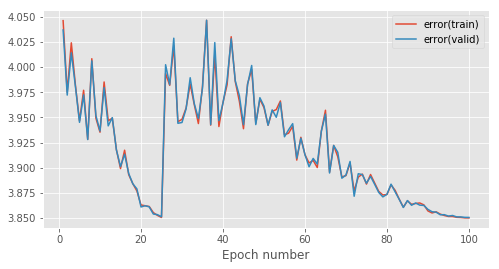

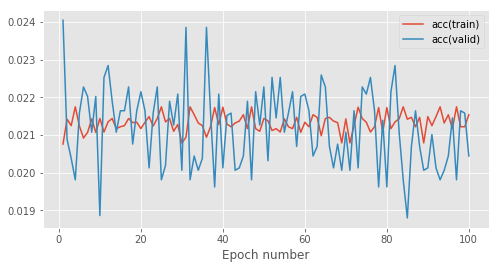

In [8]:
##### use of a warm restart


from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.00005
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_warm = CosineAnnealingWithWarmRestarts(min_learning_rate=0.0, max_learning_rate=1.0,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_warm)


